# Unit 5 - Financial Planning

In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [16]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Set current amount of crypto assets
my_btc = 100
my_eth = 100

# YOUR CODE HERE!

In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [19]:
btc_price = requests.get(eth_url).json()

In [20]:
btc_price

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120045762,
   'total_supply': 120045762,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2841.12,
     'volume_24h': 11502015079,
     'market_cap': 341504606894,
     'percentage_change_1h': -0.734645035742278,
     'percentage_change_24h': -3.07961329123342,
     'percentage_change_7d': 12.810154247377,
     'percent_change_1h': -0.734645035742278,
     'percent_change_24h': -3.07961329123342,
     'percent_change_7d': 12.810154247377},
    'CAD': {'price': 3581.515872,
     'volume_24h': 14499440208.5874,
     'market_cap': 430500707450.576,
     'percent_change_1h': -0.734645035742278,
     'percent_change_24h': -3.07961329123342,
     'percent_change_7d': 12.810154247377}},
   'last_updated': 1647833273}},
 'metadata': {'timestamp': 1647833273,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [21]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()["data"]["1"]["quotes"]["CAD"]["price"]


# Fetch current ETH price
eth_price = requests.get(eth_url).json()["data"]["1027"]["quotes"]["CAD"]["price"]
# YOUR CODE HERE!

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 100 BTC is $5142239.52
The current value of your 100 ETH is $358151.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [23]:
# Set Alpaca API key and secret

# YOUR CODE HERE!

APCA_API_KEY_ID="PKUPE92FYA6CXHSLCS9X"
APCA_API_SECRET_KEY="wSHqKfLUonBdSvEu8gc4t60YThF4yR7EwbjNjUlL"
NASDAQ_API_KEY="jgi2TYQZSAGzt5-Egn5C"
#pk.eyJ1IjoidGJsYXNlciIsImEiOiJjbDByeGN2anEwN3ZoM2NwbjN2cjBycm5nIn0.jPPYxBWujOivBY-TNhCq6w


# Create the Alpaca API object
api = tradeapi.REST(
    key_id=APCA_API_KEY_ID,
    secret_key=APCA_API_SECRET_KEY,
    api_version="v2"
)
# YOUR CODE HERE!

In [28]:
from alpaca_trade_api.rest import REST,TimeFrame

In [30]:
api = REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY)

In [31]:

test_df = api.get_bars("AAPL", TimeFrame.Day, "2021-06-08", "2021-06-19", adjustment="raw").df

In [45]:
# Format current date as ISO format
current_date = (pd.to_datetime("today") - pd.Timedelta(days=1)).strftime("%Y-%m-%d")
days_1000 = (pd.to_datetime("today") - pd.Timedelta(days=1000)).strftime("%Y-%m-%d")

#current_date - 1 day



# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]


# Set timeframe to '1D' for Alpaca API

timeframe = "1D"


# Get current closing prices for SPY and AGG (use a limit=1000 parameter to call the most recent 1000 days of data)
df_today = api.get_bars(tickers, TimeFrame.Day, days_1000, current_date,adjustment="raw").df
#df_today = api.get_barset(tickers, timeframe, limit=1000).df
#df_today = api.get_barset(tickers, timeframe, limit=1000, ).df




# YOUR CODE HERE!


# Preview DataFrame
df_today.sample(10)
# YOUR CODE HERE!


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-17 05:00:00+00:00,331.72,332.1800,330.7897,332.01,97746515,259004,331.586784,SPY
2021-05-21 04:00:00+00:00,114.36,114.4000,114.2300,114.34,3874459,12593,114.294342,AGG
2020-09-16 04:00:00+00:00,341.50,343.0600,338.5200,338.88,82211256,394864,340.592696,SPY
2019-11-08 05:00:00+00:00,307.82,309.0036,307.0300,308.93,49068959,201770,308.340248,SPY
2021-10-29 04:00:00+00:00,114.38,114.7800,114.3500,114.64,10045337,26160,114.610776,AGG
2020-03-19 04:00:00+00:00,239.26,247.3800,232.2200,240.55,289375593,2855927,241.350207,SPY
2021-09-02 04:00:00+00:00,116.02,116.0600,115.9200,116.05,5427270,14341,116.007801,AGG
2019-10-09 04:00:00+00:00,113.55,113.5600,113.3590,113.49,3333988,11224,113.459773,AGG
2020-01-15 05:00:00+00:00,327.33,329.0200,327.2600,328.16,73270483,293442,328.145177,SPY


In [46]:
df_today.shape

(1380, 8)

In [47]:
df_today

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-06-25 04:00:00+00:00,111.360,111.4400,111.2200,111.34,3111092,14344,111.364505,AGG
2019-06-26 04:00:00+00:00,111.290,111.3100,111.0600,111.09,3703224,13654,111.151757,AGG
2019-06-27 04:00:00+00:00,111.250,111.4100,111.1633,111.40,2963646,14735,111.338162,AGG
2019-06-28 04:00:00+00:00,111.360,111.4684,111.3200,111.35,9887791,19668,111.395360,AGG
2019-07-01 04:00:00+00:00,111.250,111.2700,111.0100,111.18,4211486,17456,111.152261,AGG
...,...,...,...,...,...,...,...,...
2022-03-14 04:00:00+00:00,420.975,424.5500,415.7900,417.00,91930409,863515,419.203845,SPY
2022-03-15 04:00:00+00:00,419.900,426.8400,418.4200,426.17,104219651,920659,422.752423,SPY
2022-03-16 04:00:00+00:00,429.940,435.6800,424.8000,435.62,138130298,1344164,431.339744,SPY


In [48]:
# Pick AGG and SPY close prices
agg_close_price = df_today[df_today["symbol"] == "AGG"]["close"].iloc[-1]
spy_close_price = df_today[df_today["symbol"] == "SPY"]["close"].iloc[-1]
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.1
Current SPY closing price: $444.52


In [49]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# YOUR CODE HERE!

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [50]:
# Set monthly household income
my_income = 100000
# YOUR CODE HERE!

# Consolidate financial assets data for crypto and shares into a single dataframe
df_assets = pd.DataFrame({"Crypto": [my_btc_value, my_eth_value], "Shares": [my_spy_value, my_agg_value]})



# YOUR CODE HERE!
df_savings = df_assets.sum(axis=1)
df_savings.index = ["crypto", "shares"]
df_savings.columns = ["amount"]
df_savings = pd.DataFrame(df_savings)
df_savings.columns = ["amount"]

# Create savings DataFrame




# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)
df_savings

,amount
crypto,5.164466e+06
shares,3.797716e+05


,amount
crypto,5.164466e+06
shares,3.797716e+05


array([<AxesSubplot:ylabel='amount'>], dtype=object)

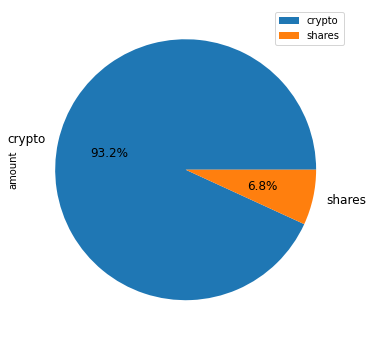

In [51]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, figsize=(6, 6), autopct="%1.1f%%", fontsize=12)
# YOUR CODE HERE!


In [52]:
# Set ideal emergency fund
monthly_income = my_income / 12
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = df_savings["amount"].sum()
# YOUR CODE HERE!

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("You are in need of some extra money!")
# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [63]:
api.get_bars(tickers, TimeFrame.Day, start_date, end_date ).df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.740,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.890,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.910,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.920,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.120,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.500,418.2200,416.8111,417.610,52076360,295872,417.505200,SPY
2021-04-27 04:00:00+00:00,417.960,418.1400,416.3000,417.520,50324187,296302,417.481280,SPY
2021-04-28 04:00:00+00:00,417.835,419.0100,416.9000,417.400,50692843,330050,417.742098,SPY


In [54]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
#df_stock_data = api.get_barset(tickers, timeframe, limit=1000, start=start_date, end=end_date).df
df_stock_data = api.get_bars(tickers, TimeFrame.Day, start_date, end_date,adjustment="raw", ).df


# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [56]:
df_stock_data.sample(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-06 04:00:00+00:00,289.24,293.31,288.900,292.8300,107250892,390959,291.952803,SPY
2017-09-19 04:00:00+00:00,109.91,109.96,109.785,109.8000,1407196,7601,109.836548,AGG
2018-07-03 04:00:00+00:00,106.03,106.21,106.025,106.2100,2429478,10866,106.144191,AGG
2020-09-25 04:00:00+00:00,322.57,329.58,321.640,328.7200,71070826,414105,326.175855,SPY
2017-04-12 04:00:00+00:00,234.80,234.96,233.770,234.1408,81864436,262862,234.298297,SPY
2020-03-16 04:00:00+00:00,240.78,256.90,237.360,241.0650,297528836,2147769,248.775358,SPY
2020-08-11 04:00:00+00:00,119.05,119.21,118.840,118.9900,7809897,19839,118.963269,AGG
2018-10-31 04:00:00+00:00,104.50,104.70,104.500,104.5900,14880451,40209,104.599344,AGG
2020-01-24 05:00:00+00:00,332.45,332.53,327.360,328.7600,87594462,456519,329.581009,SPY


In [68]:
df_stock_agg = df_stock_data[df_stock_data["symbol"] == "AGG"]
df_stock_spy = df_stock_data[df_stock_data["symbol"] == "SPY"]


df_stock_data = pd.concat([df_stock_agg, df_stock_spy], axis=1, keys=["AGG", "SPY"])





In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# for the SPY and AGG stocks

#Configuring a Monte Carlo simulation to forecast 30 years cumulative returns for the SPY and AGG stocks
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*30
)


# YOUR CODE HERE!
MC_30.portfolio_data.head()


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2016-05-02 04:00:00+00:00       15119  110.627199    AGG          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995    AGG     0.001853  206.53   
2016-05-04 04:00:00+00:00       13982  110.879063    AGG     0.000451  204.96   
2016-05-05 04:00:00+00:00       15707  111.028363    AGG     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    AGG    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2016-05-02 04:00:00+00:00  207.294812    SPY          NaN  
2016-05-03 04:00:00+00:00  206.312060    SPY    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    SPY    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    SPY    -0.000195  
2016-05-06 04:00:00+00:00  204.937074    SPY     0.003659

In [70]:
# Printing the simulation input data
# YOUR CODE HERE
MC_30.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2016-05-02 04:00:00+00:00       15119  110.627199    AGG          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995    AGG     0.001853  206.53   
2016-05-04 04:00:00+00:00       13982  110.879063    AGG     0.000451  204.96   
2016-05-05 04:00:00+00:00       15707  111.028363    AGG     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    AGG    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2016-05-02 04:00:00+00:00  207.294812    SPY          NaN  
2016-05-03 04:00:00+00:00  206.312060    SPY    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    SPY    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    SPY    -0.000195  
2016-05-06 04:00:00+00:00  204.937074    SPY     0.003659

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/arunprakash/Desktop/teaching_super/terry/a4/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004285,0.998852,0.997625,1.001428,0.999455,0.994774,0.993544,0.999475,1.000614,1.002296,...,1.000080,0.994295,1.000966,0.993722,0.992001,1.004663,0.997698,0.989518,0.991921,1.003405
2,1.005704,1.003312,0.996955,0.999457,1.005439,0.992491,0.983171,0.998466,1.000010,0.992718,...,0.995785,0.990655,1.005522,0.987340,0.998838,1.003738,0.985516,0.993495,0.991254,1.005774
3,1.007479,1.007386,1.001665,1.006911,1.007672,1.010055,0.972062,1.004834,1.002717,0.993398,...,0.998635,0.994270,0.998021,0.976396,0.996392,1.004745,0.984229,0.992890,0.993998,0.992068
4,1.011386,1.002075,1.007298,0.995269,1.002908,1.015027,0.977692,1.013460,1.005030,0.992168,...,1.005728,0.985024,0.997641,0.981547,0.998836,1.012242,0.984734,0.998083,1.001253,0.984975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.275222,11.272274,5.374487,7.143552,7.306549,22.426020,25.818609,15.519914,13.781926,8.704649,...,18.646425,16.696910,8.241831,9.803000,7.614158,14.981799,9.557325,9.438799,11.550956,3.885132
7557,5.255937,11.155251,5.415176,7.213287,7.415016,22.525195,25.883192,15.517552,13.901547,8.766845,...,18.587073,16.569627,8.278081,9.797338,7.670267,15.154896,9.616270,9.504185,11.443058,3.860048
7558,5.269127,11.013528,5.387544,7.206131,7.433967,22.571815,26.024146,15.406342,14.068087,8.788859,...,18.698736,16.693529,8.316728,9.849163,7.647283,15.120375,9.489812,9.450591,11.411306,3.829774
7559,5.264880,11.035873,5.404546,7.226715,7.508098,22.414177,26.307946,15.293945,14.205100,8.688013,...,18.577129,16.638495,8.317967,9.831689,7.680860,15.214312,9.530189,9.499031,11.466189,3.848043


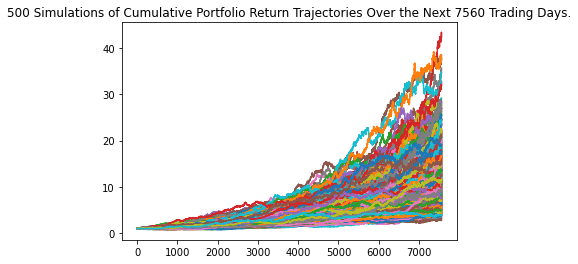

In [72]:
# Plot simulation outcomes
# YOUR CODE HERE!

# Plot simulation outcomes
line_plot = MC_30.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30_sim_plot.png", bbox_inches="tight")

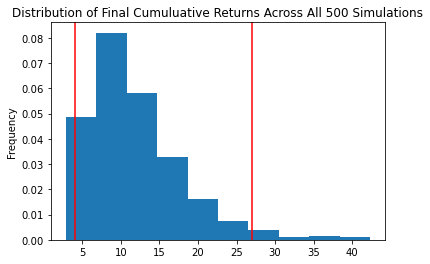

In [73]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_30.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.901173
std               6.179435
min               2.853444
25%               7.427692
50%              10.505423
75%              14.854811
max              42.332868
95% CI Lower      4.052414
95% CI Upper     26.997807
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [75]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $81048.28 and $539956.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [76]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121572.42 and $809934.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [77]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# for the SPY and AGG stocks
MC_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*5
)
# YOUR CODE HERE!

In [78]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/arunprakash/Desktop/teaching_super/terry/a4/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994576,0.998295,0.993498,0.996346,0.990154,1.009130,1.005115,1.000654,1.012161,0.997113,...,0.999248,1.008703,1.009593,0.995446,0.997055,1.000958,1.001300,0.989770,1.002278,0.993786
2,0.993924,0.994809,1.000502,0.993207,0.980700,1.004219,1.003823,1.009653,1.011827,0.995546,...,0.998784,1.018885,1.013118,0.998220,1.001224,0.993758,1.007284,0.990549,1.001803,1.002943
3,0.992666,0.997234,1.011012,0.987911,0.984051,1.000471,1.004563,1.014187,1.011583,0.993919,...,0.996288,1.016470,1.015507,1.003867,0.999773,0.997282,0.994809,0.985812,1.001579,1.008141
4,0.982362,0.997807,1.021413,0.988149,0.974461,1.008049,1.008388,1.025771,1.012390,1.003005,...,1.001514,1.025618,1.020102,1.016297,1.008014,0.994132,0.992670,0.991578,1.007742,0.996464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.288620,1.647020,1.195326,1.146776,0.966899,1.276381,1.512304,1.147788,1.603500,1.502247,...,1.492491,1.822128,1.980791,1.589942,2.014445,1.661944,2.070974,1.881441,1.486511,1.150075
1257,1.293578,1.648606,1.195234,1.157399,0.960383,1.279804,1.511629,1.151059,1.603734,1.487895,...,1.507985,1.811941,1.961914,1.597362,2.009669,1.669263,2.062520,1.866593,1.488693,1.145279
1258,1.307232,1.651672,1.198029,1.151733,0.967082,1.276329,1.511555,1.146276,1.593779,1.492154,...,1.492010,1.821716,1.948234,1.605393,2.000916,1.654940,2.071941,1.873725,1.495487,1.142442
1259,1.303584,1.653085,1.204701,1.150960,0.972571,1.269352,1.519321,1.146680,1.582408,1.504091,...,1.502306,1.820387,1.933668,1.601531,1.991597,1.655507,2.077487,1.867759,1.491493,1.144614


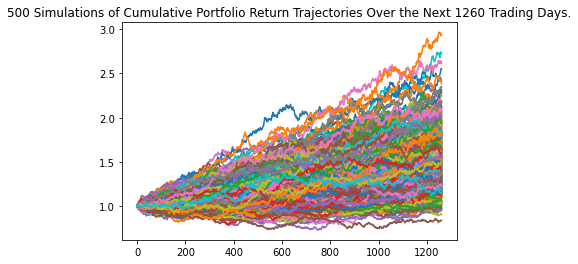

In [79]:
# Plot simulation outcomes
line_plot = MC_5.plot_simulation()
# YOUR CODE HERE!

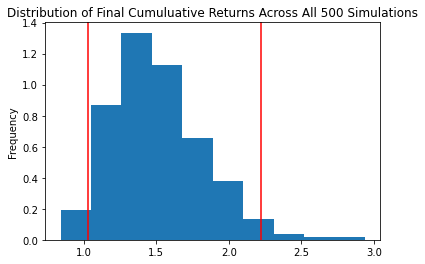

In [80]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5.plot_distribution()
# YOUR CODE HERE!

In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5.summarize_cumulative_return()
# YOUR CODE HERE!

# Print summary statistics
print(tbl)
# YOUR CODE HERE!

count           500.000000
mean              1.508891
std               0.316006
min               0.840373
25%               1.282889
50%               1.464159
75%               1.696088
max               2.938201
95% CI Lower      1.028403
95% CI Upper      2.219271
Name: 1260, dtype: float64


In [82]:
# Set initial investment
initial_investment = 60000
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $61704.17 and $133156.25


### Ten Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# for the SPY and AGG stocks
MC_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*10
)

# YOUR CODE HERE!

In [84]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/arunprakash/Desktop/teaching_super/terry/a4/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005819,0.991088,0.991880,1.008088,0.991963,1.008872,1.010471,1.005255,1.002969,0.992112,...,0.998661,0.998115,0.986367,1.007728,1.008223,0.998072,0.999178,0.997278,0.995095,1.001067
2,1.009040,0.985589,0.997545,1.013267,0.996292,1.004536,1.002073,1.012200,0.995061,0.999867,...,1.009180,0.991226,0.984551,1.006210,1.000728,1.002338,0.998451,0.992547,0.997020,1.011087
3,1.007969,0.995055,1.000530,1.018011,0.990099,1.013742,1.009920,1.004174,1.001178,0.995755,...,1.008163,0.988101,0.987768,1.010495,0.999660,1.000244,0.995453,0.999299,0.984277,1.016905
4,1.016913,0.995496,1.007633,1.013408,0.987087,1.004358,1.015697,0.997851,1.006125,0.993959,...,1.010470,0.985198,0.987205,1.014483,0.995139,1.000354,0.998327,0.990312,0.986765,1.001798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.752670,2.959004,0.875372,1.998658,2.154651,2.496155,2.729743,2.595992,2.078566,1.948729,...,3.835001,2.264252,3.017245,2.290399,2.272553,2.217275,1.877297,3.341885,2.063250,1.903442
2517,3.750203,2.962696,0.876360,1.999827,2.161963,2.508852,2.721913,2.623201,2.077434,1.945981,...,3.826364,2.268597,3.044485,2.287718,2.265692,2.236988,1.869861,3.328865,2.068147,1.916082
2518,3.756145,2.951898,0.872589,2.008369,2.149039,2.513593,2.726301,2.626387,2.085918,1.957334,...,3.830624,2.246190,3.026214,2.284643,2.256521,2.251349,1.858707,3.315132,2.073754,1.891409
2519,3.736829,2.941975,0.874829,2.025673,2.146927,2.519565,2.737659,2.632717,2.084322,1.978815,...,3.818376,2.247000,3.034963,2.279075,2.245621,2.261340,1.861488,3.333147,2.067782,1.900967


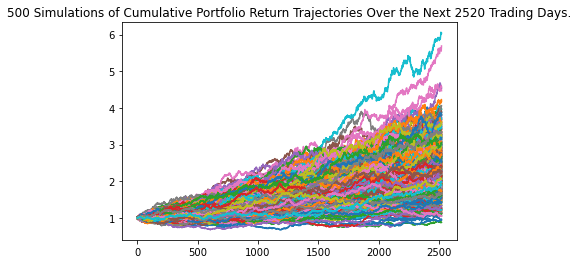

In [85]:
# Plot simulation outcomes
line_plot = MC_10.plot_simulation()
# YOUR CODE HERE!

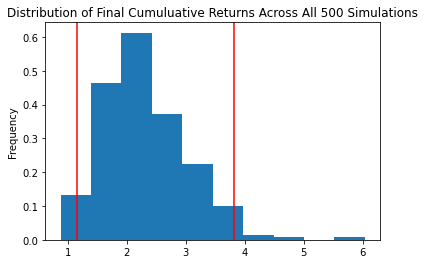

In [86]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10.plot_distribution()
# YOUR CODE HERE!

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10.summarize_cumulative_return()
# YOUR CODE HERE!

# Print summary statistics
print(tbl)
# YOUR CODE HERE!

count           500.000000
mean              2.306289
std               0.716220
min               0.878191
25%               1.783863
50%               2.189611
75%               2.743151
max               6.033648
95% CI Lower      1.158062
95% CI Upper      3.818156
Name: 2520, dtype: float64


In [88]:
# Set initial investment
initial_investment = 60000
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69483.72 and $229089.39
